## 3.Perform the following operations using Python on the Airquality and Heart Diseases datasets.
    a.Data cleaning
    b.Data integration
    c.Data transformation

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('heart.csv')
df1 = pd.read_csv('AirQuality.csv', sep = ';')

In [6]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,patient_id
823,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1,NaN
634,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,NaN
93,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0,3.194040e+19


In [7]:
df1.sample(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
8263,18/02/2005,01.00.00,"1,3",958.0,-200.0,"3,1",660.0,172.0,935.0,130.0,905.0,654.0,"6,8","48,2","0,4792",NaN,NaN
2809,05/07/2004,19.00.00,"3,5",1200.0,-200.0,"19,1",1270.0,239.0,654.0,176.0,1906.0,1264.0,"33,6","22,9","1,1747",NaN,NaN
5797,07/11/2004,07.00.00,"0,4",752.0,-200.0,"1,2",516.0,53.0,1370.0,35.0,997.0,440.0,"15,1","52,0","0,8878",NaN,NaN


## a. Data Cleaning

In [9]:
df.isnull().sum().sum()

872

In [10]:
df1.isnull().sum().sum()

20652

In [12]:
df3 = df1.iloc[:,:15] # creating a new dataframe for AirQuality dataset without the two unnamed features

In [13]:
df3.sample(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
4380,09/09/2004,06.00.00,"0,6",889.0,-200.0,"4,9",760.0,143.0,1224.0,81.0,1213.0,806.0,"20,3","35,5","0,8342"
8857,14/03/2005,19.00.00,"6,5",1626.0,-200.0,"29,1",1531.0,782.0,371.0,234.0,1937.0,2000.0,"16,7","43,4","0,8168"
7148,02/01/2005,14.00.00,"2,1",1159.0,-200.0,"6,5",837.0,344.0,742.0,160.0,1087.0,1311.0,"12,3","41,7","0,5961"


In [14]:
df3.isnull().sum().sum()

1710

In [16]:
df3.dropna(inplace=True)

In [18]:
df3.shape

(9357, 15)

In [19]:
df3.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

In [20]:
#Replacing the Object dtype of Date to Date dtype
df3['Date']=pd.to_datetime(df3['Date']);

/tmp/ipykernel_95551/858102814.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df3['Date']=pd.to_datetime(df3['Date']);


In [21]:
df3.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                   object
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                 object
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                        object
RH                       object
AH                       object
dtype: object

In [22]:
# As we see there are some commas instead of points in some of the records. So, to Replace the Comma's with Dots

df3.replace(to_replace=',',value='.',regex=True,inplace=True)
df3

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03,19.00.00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [23]:
#Drop Duplicates

df3.drop_duplicates(inplace=True)
df3 

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03,19.00.00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [24]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,patient_id
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,2.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,3.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,5.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,NaN
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,NaN
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,NaN
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,NaN


## b. Data Integration

In [26]:
subset1=df3[['Date','Time','T','RH','AH']].loc[0:50]
subset1.head()

,Date,Time,T,RH,AH
0,2004-10-03,18.00.00,13.6,48.9,0.7578
1,2004-10-03,19.00.00,13.3,47.7,0.7255
2,2004-10-03,20.00.00,11.9,54.0,0.7502
3,2004-10-03,21.00.00,11.0,60.0,0.7867
4,2004-10-03,22.00.00,11.2,59.6,0.7888


In [27]:
subset2=df3[['Date','Time','T','RH','AH']].loc[51:100]
subset2.head()

,Date,Time,T,RH,AH
51,2004-12-03,21.00.00,12.1,53.3,0.7536
52,2004-12-03,22.00.00,11.0,59.1,0.7740
53,2004-12-03,23.00.00,9.7,64.6,0.7771
54,2004-03-13,00.00.00,9.5,64.1,0.7597
55,2004-03-13,01.00.00,9.1,63.9,0.7423


In [28]:
## Integrating/ Merging these subsets

Merged=pd.concat([subset1,subset2])
Merged

,Date,Time,T,RH,AH
0,2004-10-03,18.00.00,13.6,48.9,0.7578
1,2004-10-03,19.00.00,13.3,47.7,0.7255
2,2004-10-03,20.00.00,11.9,54.0,0.7502
3,2004-10-03,21.00.00,11.0,60.0,0.7867
4,2004-10-03,22.00.00,11.2,59.6,0.7888
...,...,...,...,...,...
96,2004-03-14,18.00.00,19.7,36.7,0.8307
97,2004-03-14,19.00.00,18.4,41.7,0.8732
98,2004-03-14,20.00.00,17.6,46.1,0.9210
99,2004-03-14,21.00.00,16.7,49.6,0.9320


## c. Data Transformation

In [29]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,patient_id
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,2.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,3.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,5.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,NaN
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,NaN
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,NaN
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,NaN


In [30]:
df.loc[df['sex']==1,'sex']='M' # Replacing 1 with M
df.loc[df['sex']==0,'sex']='F' # Replacing 0 with F

In [31]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,patient_id
0,52,M,0,125,212,0,1,168,0,1.0,2,2,3,0,1.0
1,53,M,0,140,203,1,0,155,1,3.1,0,0,3,0,2.0
2,70,M,0,145,174,0,1,125,1,2.6,0,0,3,0,3.0


In [33]:
#to encode categorical variables into numerical labels

from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
df["sex"]=labelencoder.fit_transform(df["sex"])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,patient_id
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,1.0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,2.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,3.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,5.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,NaN
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,NaN
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,NaN
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,NaN


## We have again transformed Categorical values into numerical by using LabelEncoder

## 4.Perform the following operations using Python on the Airquality and Heart Diseases datasets.
    a.Data transformation
    b.Error correcting
    c.Datamodel building

## Data Tranformation apan ne upar dekha..ab seedhe error correction krte h..

## b. Error Correction

In [42]:
df[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,patient_id
52,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,8.626757e+10
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,2.596950e+17
128,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1,6.590350e+26
208,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,NaN
242,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,NaN
290,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1,NaN
340,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,NaN
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0,NaN
417,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1,NaN
428,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0,NaN


## Is dataset me 'ca' = 4 bohot baar aa gyi h isko apan correct krte h iske jagah NaN values daal k..Error correction dikhane k liye..

In [43]:
#It locates the rows where the value in the 'ca' column is equal to 4 
#and replaces those values with NaN (Not a Number)

df.loc[df['ca']==4,'ca']=np.NaN

## To dekha aapne!! Kaise saari 'ca' = 4 ki values NaN ho gyi..!!

In [52]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca             18
thal            0
target          0
patient_id    872
dtype: int64

In [53]:
df = df.fillna(df.median())

In [54]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
patient_id    0
dtype: int64

## Ab data set me koi Null value nhi h..

## c. Model Building

In [55]:
from sklearn.model_selection import train_test_split

In [72]:
X = df.iloc[:,:-2] # Except last column, apan baki saare features ko X me rakh rahe h

In [73]:
y = df.iloc[:,-2] # y me apan last wala feature rkh rhe jo k apna dependent variable h

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [75]:
X_train.shape, X_test.shape,y_train.shape

((717, 13), (308, 13), (717,))

In [76]:
from sklearn.svm import SVC   # Support vector classifier

In [77]:
svc = SVC()

In [78]:
svc.fit(X_train, y_train)

SVC()

In [79]:
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [81]:
print(('Accuracy Score :',accuracy_score(y_test, y_pred)))

('Accuracy Score :', 0.75)


In [83]:
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[102  43]
 [ 34 129]]


In [85]:
print('Classification Report:\n',classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.70      0.73       145
           1       0.75      0.79      0.77       163

    accuracy                           0.75       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.75      0.75      0.75       308



## 5.Visualize the data using Python libraries matplotlib, seaborn by plotting the graphs for the Air quality and HeartDiseases datasets.

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,patient_id
521,58,1,1,125,220,0,1,144,0,0.4,1,0.0,3,1,8.944390e+15
941,52,0,2,136,196,0,0,169,0,0.1,1,0.0,2,1,8.944390e+15
104,52,1,3,118,186,0,0,190,0,0.0,1,0.0,1,1,6.356310e+21


<AxesSubplot: >

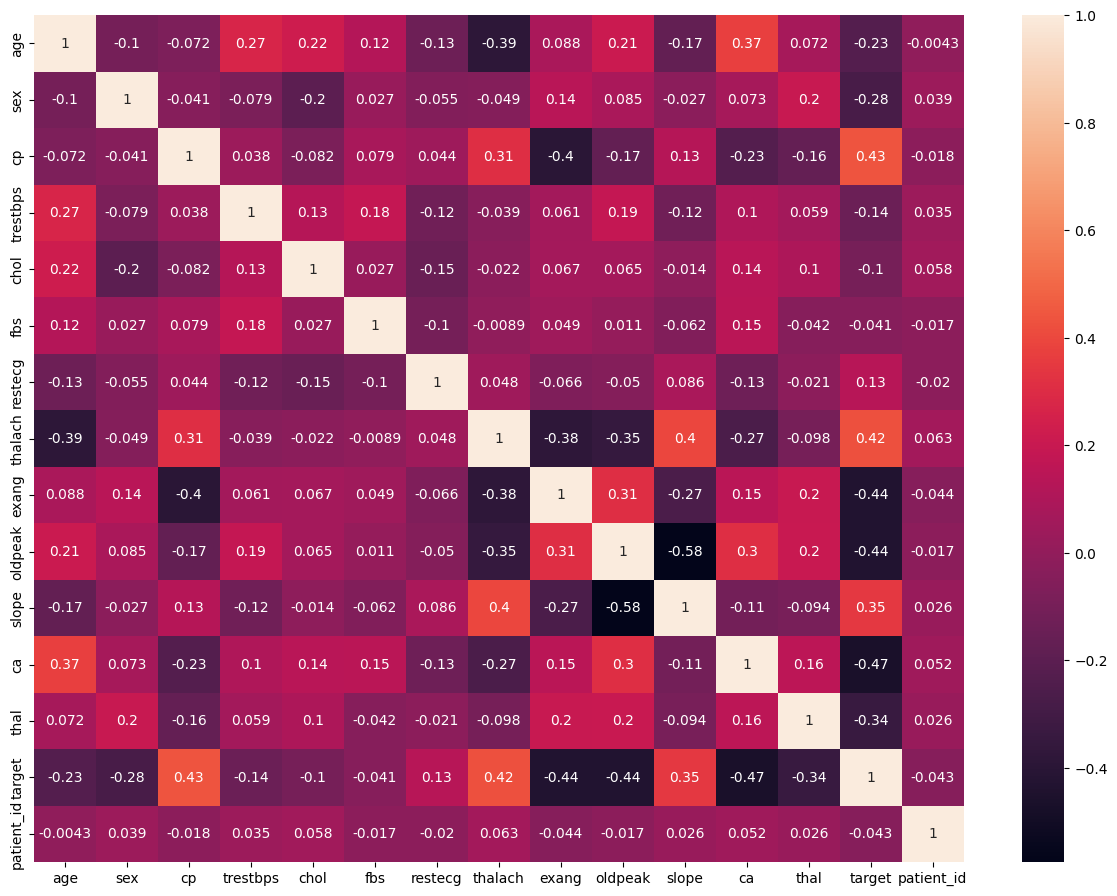

In [96]:

plt.figure(figsize=(15,11))
sns.heatmap(df.corr(), annot=True)


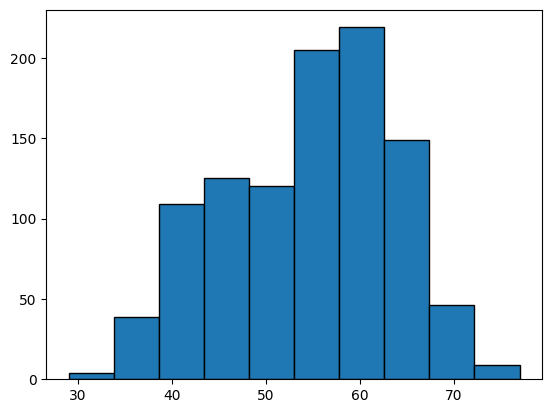

In [98]:
plt.hist(df['age'], bins=10, edgecolor='k')
plt.show()

<BarContainer object of 2 artists>

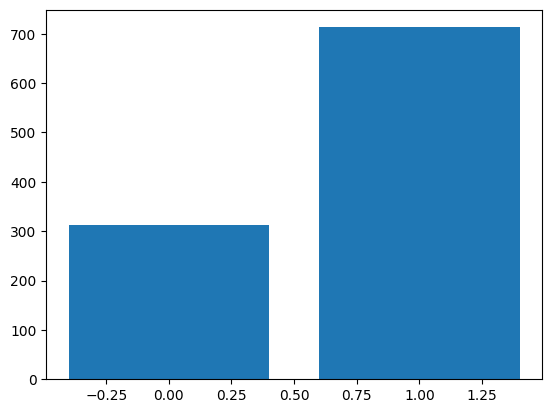

In [105]:
sex_counts = df['sex'].value_counts()
plt.bar(sex_counts.index, sex_counts.values)

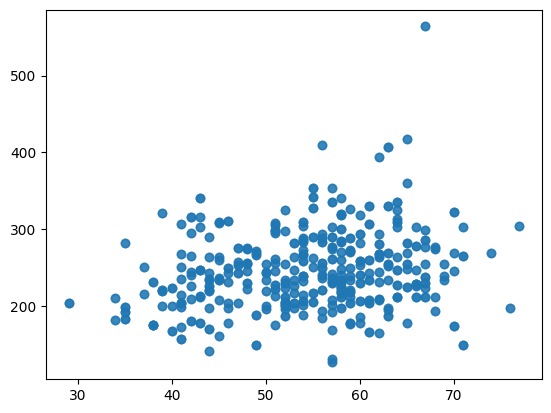

In [106]:
plt.scatter(df['age'], df['chol'], alpha=0.5)

Text(0.5, 1.0, 'Resting Blood Pressure by Target')

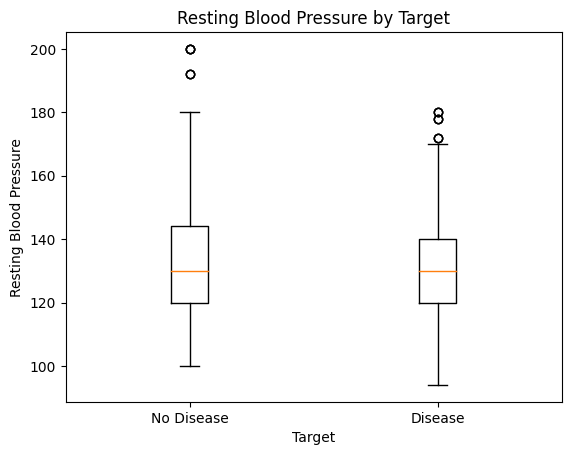

In [107]:
plt.boxplot([df[df['target'] == 0]['trestbps'],
             df[df['target'] == 1]['trestbps']],
            labels=['No Disease', 'Disease'])
plt.xlabel('Target')
plt.ylabel('Resting Blood Pressure')
plt.title('Resting Blood Pressure by Target')


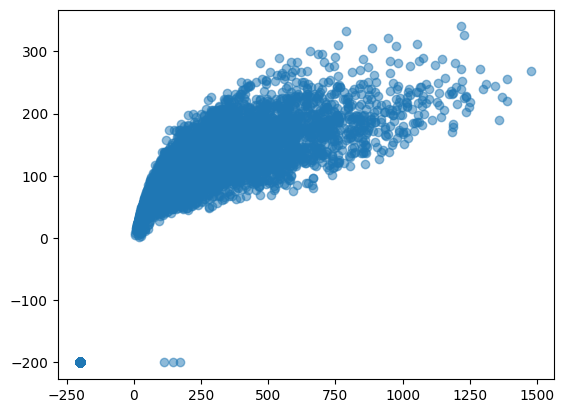

In [108]:
## AirQuality

plt.scatter(df3['NOx(GT)'], df3['NO2(GT)'], alpha=0.5)

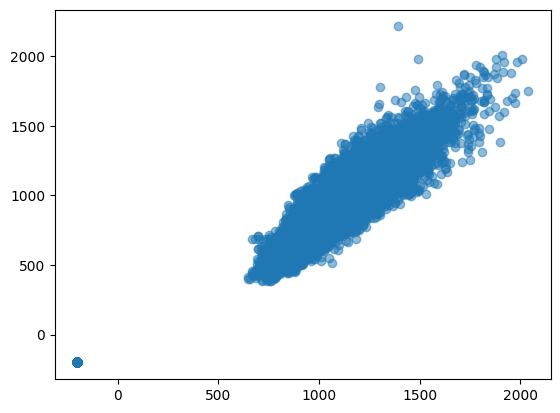

In [110]:
plt.scatter(df3['PT08.S1(CO)'], df3['PT08.S2(NMHC)'], alpha=0.5)

/tmp/ipykernel_95551/2799180019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


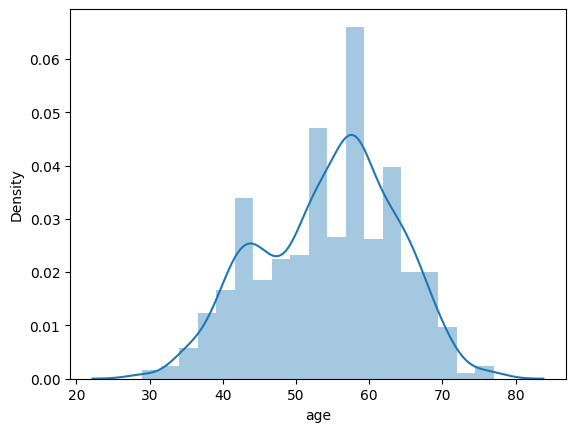

In [118]:
sns.distplot(df['age'])
plt.show()

In [119]:
df3

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-10-03,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-10-03,19.00.00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-10-03,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-10-03,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-10-03,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2005-04-04,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2005-04-04,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2005-04-04,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
